<a href="https://colab.research.google.com/github/Webiwo/publications/blob/main/xgboost_catboost_adaboost_gbm_lightgbm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# XGBoost vs CatBoost vs AdaBoost vs GBM vs LightGBM

In this task, we compare the performance of five different Python packages for ensemble boosting, each representing different algorithmic and implementation variants of boosting.

## Dataset
[Breast Cancer on UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/14/breast+cancer)

This breast cancer domain was obtained from the University Medical Centre, Institute of Oncology, Ljubljana, Yugoslavia. This is one of three domains provided by the Oncology Institute that has repeatedly appeared in the machine learning literature.

| Variable Name | Role   | Type        | Demographic | Description                                                                 | Units | Missing Values |
|----------------|--------|-------------|-------------|------------------------------------------------------------------------------|--------|----------------|
| Class          | Target | Binary      |             | no-recurrence-events, recurrence-events                                      |        | no             |
| age            | Feature| Categorical | Age         | 10-19, 20-29, 30-39, 40-49, 50-59, 60-69, 70-79, 80-89, 90-99               | years  | no             |
| menopause      | Feature| Categorical |             | lt40, ge40, premeno                                                         |        | no             |
| tumor-size     | Feature| Categorical |             | 0-4, 5-9, 10-14, 15-19, 20-24, 25-29, 30-34, 35-39, 40-44, 45-49, 50-54, 55-59 |        | no             |
| inv-nodes      | Feature| Categorical |             | 0-2, 3-5, 6-8, 9-11, 12-14, 15-17, 18-20, 21-23, 24-26, 27-29, 30-32, 33-35, 36-39 |        | no             |
| node-caps      | Feature| Binary      |             | yes, no                                                                     |        | yes            |
| deg-malig      | Feature| Integer     |             | 1, 2, 3                                                                     |        | no             |
| breast         | Feature| Binary      |             | left, right                                                                 |        | no             |
| breast-quad    | Feature| Categorical |             | left-up, left-low, right-up, right-low, central                             |        | yes            |
| irradiat       | Feature| Binary      |             | yes, no

In [70]:
!pip install catboost

In [71]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

## Prepare dataset

In [72]:
!unzip breast+cancer.zip

Archive:  breast+cancer.zip
replace Index? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Index                   
  inflating: breast-cancer.data      
  inflating: breast-cancer.names     


In [73]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

In [74]:
df = pd.read_csv('breast-cancer.data',
    names=[
        'class',
        'age',
        'menopause',
        'tumor-size',
        'inv-nodes',
        'node-caps',
        'deg-malig',
        'breast',
        'breast-quad',
        'irradiat'
    ]
)

In [75]:
df.sample(10)

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
92,no-recurrence-events,50-59,ge40,25-29,0-2,no,2,right,left_up,no
116,no-recurrence-events,30-39,premeno,15-19,0-2,no,1,left,left_low,no
190,no-recurrence-events,40-49,premeno,15-19,12-14,no,3,right,right_low,yes
62,no-recurrence-events,50-59,ge40,0-4,0-2,no,1,left,left_low,no
118,no-recurrence-events,30-39,premeno,10-14,0-2,no,1,right,left_low,no
225,recurrence-events,40-49,ge40,20-24,3-5,no,3,right,left_low,yes
109,no-recurrence-events,60-69,ge40,30-34,0-2,no,1,right,left_up,no
234,recurrence-events,60-69,ge40,30-34,0-2,no,3,right,left_up,yes
91,no-recurrence-events,50-59,ge40,20-24,0-2,no,3,left,left_up,no
199,no-recurrence-events,50-59,premeno,25-29,0-2,no,1,left,left_low,no


In [76]:
df.shape

(286, 10)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor-size   286 non-null    object
 4   inv-nodes    286 non-null    object
 5   node-caps    286 non-null    object
 6   deg-malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast-quad  286 non-null    object
 9   irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [78]:
for column in df.columns:
    print(f"\n===== {column} =====")
    print(df[column].value_counts().sort_index())


===== class =====
class
no-recurrence-events    201
recurrence-events        85
Name: count, dtype: int64

===== age =====
age
20-29     1
30-39    36
40-49    90
50-59    96
60-69    57
70-79     6
Name: count, dtype: int64

===== menopause =====
menopause
ge40       129
lt40         7
premeno    150
Name: count, dtype: int64

===== tumor-size =====
tumor-size
0-4       8
10-14    28
15-19    30
20-24    50
25-29    54
30-34    60
35-39    19
40-44    22
45-49     3
5-9       4
50-54     8
Name: count, dtype: int64

===== inv-nodes =====
inv-nodes
0-2      213
12-14      3
15-17      6
24-26      1
3-5       36
6-8       17
9-11      10
Name: count, dtype: int64

===== node-caps =====
node-caps
?        8
no     222
yes     56
Name: count, dtype: int64

===== deg-malig =====
deg-malig
1     71
2    130
3     85
Name: count, dtype: int64

===== breast =====
breast
left     152
right    134
Name: count, dtype: int64

===== breast-quad =====
breast-quad
?              1
central       21

* features `age`, `menopause`, `tumor-size`, `inv-nodes` and `deg-malig` are
**ordinal**
* features `node-caps`, `breast`, `breast-quad` and `irradiat` are **categorical**

In [79]:
df_copy = df.copy()

In [80]:
import numpy as np

In [81]:
df.loc[df['node-caps']=="?",["node-caps"]] = np.nan
df.loc[df['breast-quad']=="?", ["breast-quad"]] = np.nan

In [82]:
df[df['node-caps'].isnull()]

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
145,no-recurrence-events,40-49,premeno,25-29,0-2,NaN,2,left,right_low,yes
163,no-recurrence-events,60-69,ge40,25-29,3-5,NaN,1,right,left_up,yes
164,no-recurrence-events,60-69,ge40,25-29,3-5,NaN,1,right,left_low,yes
183,no-recurrence-events,50-59,ge40,30-34,9-11,NaN,3,left,left_up,yes
184,no-recurrence-events,50-59,ge40,30-34,9-11,NaN,3,left,left_low,yes
233,recurrence-events,70-79,ge40,15-19,9-11,NaN,1,left,left_low,yes
263,recurrence-events,50-59,lt40,20-24,0-2,NaN,1,left,left_up,no
264,recurrence-events,50-59,lt40,20-24,0-2,NaN,1,left,left_low,no


In [83]:
df[df['breast-quad'].isnull()]

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
206,recurrence-events,50-59,ge40,30-34,0-2,no,3,left,NaN,no


### Preparing encoders

In [84]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.impute import KNNImputer

In [85]:
categorical_features = ['node-caps', 'breast', 'breast-quad', 'irradiat']
ordinal_features = ['age', 'menopause', 'tumor-size', 'inv-nodes', 'deg-malig']
target ="class"

In [86]:
age_order = ["10-19","20-29","30-39","40-49","50-59","60-69","70-79","80-89","90-99"]
menopause_order = ["lt40","ge40","premeno"]
tumor_size_order = ["0-4","5-9","10-14","15-19","20-24","25-29","30-34","35-39","40-44","45-49","50-54","55-59"]
inv_nodes_order = ["0-2","3-5","6-8","9-11","12-14","15-17","18-20","21-23","24-26","27-29","30-32","33-35","36-39"]
deg_malig_order = [1, 2, 3]

In [87]:
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [88]:
ordinal_transformer = OrdinalEncoder(categories=[
    age_order, menopause_order, tumor_size_order, inv_nodes_order, deg_malig_order
])

In [89]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('ord', ordinal_transformer, ordinal_features)
    ],
    remainder='passthrough'
)

In [90]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('imputer', KNNImputer()),
])

In [91]:
X = df.drop(columns=[target])
y = df[target]

X.shape, y.shape

((286, 9), (286,))

In [92]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_encoded.shape

(286,)

In [93]:
y[:5]

,class
0,no-recurrence-events
1,no-recurrence-events
2,no-recurrence-events
3,no-recurrence-events
4,no-recurrence-events


In [94]:
pipeline.fit(X, y_encoded)
X_transformed = pipeline.transform(X)

In [95]:
ct = pipeline.named_steps["preprocessor"]

In [96]:
onehot_cols = ct.named_transformers_['cat'].get_feature_names_out(categorical_features)
onehot_cols

array(['node-caps_no', 'node-caps_yes', 'node-caps_nan', 'breast_left',
       'breast_right', 'breast-quad_central', 'breast-quad_left_low',
       'breast-quad_left_up', 'breast-quad_right_low',
       'breast-quad_right_up', 'breast-quad_nan', 'irradiat_no',
       'irradiat_yes'], dtype=object)

In [97]:
ordinal_cols = ordinal_features
ordinal_cols

['age', 'menopause', 'tumor-size', 'inv-nodes', 'deg-malig']

In [98]:
remainder_cols = [col for col in X.columns if col not in categorical_features + ordinal_features]
remainder_cols

[]

In [99]:
encoded_columns = list(onehot_cols) + ordinal_cols + remainder_cols

In [100]:
X_encoded = pd.DataFrame(X_transformed, columns=encoded_columns)

X_encoded.head()

,node-caps_no,node-caps_yes,node-caps_nan,breast_left,breast_right,breast-quad_central,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up,breast-quad_nan,irradiat_no,irradiat_yes,age,menopause,tumor-size,inv-nodes,deg-malig
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0,6.0,0.0,2.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,2.0,4.0,0.0,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,2.0,4.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,5.0,1.0,3.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,2.0,0.0,0.0,1.0


In [101]:
X_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   node-caps_no           286 non-null    float64
 1   node-caps_yes          286 non-null    float64
 2   node-caps_nan          286 non-null    float64
 3   breast_left            286 non-null    float64
 4   breast_right           286 non-null    float64
 5   breast-quad_central    286 non-null    float64
 6   breast-quad_left_low   286 non-null    float64
 7   breast-quad_left_up    286 non-null    float64
 8   breast-quad_right_low  286 non-null    float64
 9   breast-quad_right_up   286 non-null    float64
 10  breast-quad_nan        286 non-null    float64
 11  irradiat_no            286 non-null    float64
 12  irradiat_yes           286 non-null    float64
 13  age                    286 non-null    float64
 14  menopause              286 non-null    float64
 15  tumor-

## 📊 Comparison of Algorithms


In [126]:
X.shape, X_encoded.shape, y_encoded.shape

((286, 9), (286, 18), (286,))

In [128]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

def balanced_train_test_split(X, y, test_size, smote=False):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # balance the classes of the training data
    D_train = X_train.copy()
    D_train['y'] = y_train

    D1 = D_train[D_train.y == 1]

    n_samples = int(X_train.shape[0]/2)

    D1 = D1.sample(n=n_samples, replace=True, random_state=42)

    D_train = pd.concat([D_train, D1])

    y_train = D_train['y']
    X_train = D_train.drop('y',axis=1)

    # Balancing the training set using SMOTE
    smote = SMOTE(random_state=42, k_neighbors=5)
    X_train, y_train = smote.fit_resample(X_train, y_train)

    return (X_train, X_test, y_train, y_test)

In [129]:
# dataset with encoded features
X_train, X_test, y_train, y_test = balanced_train_test_split(
    X_encoded,
    y_encoded,
    test_size=0.3,
    smote=True
    )
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((316, 18), (86, 18), (316,), (86,))

In [130]:
# dataset with categorical features

X_cat = X.copy()

for col in X_cat.select_dtypes(include="object").columns:
    X_cat[col] = X_cat[col].astype("category")

X_train_cat, X_test_cat, y_train_cat, y_test_cat = balanced_train_test_split(
    X_encoded,
    y_encoded,
    test_size=0.3,
    smote=True
    )
X_train_cat.shape, X_test_cat.shape, y_train_cat.shape, y_test_cat.shape

((316, 18), (86, 18), (316,), (86,))

##XGBoost with categorical features

In [131]:
results = {}

In [132]:
import time
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

In [133]:
def save_results(model, y_test, y_pred):
  results[model] =  {
        "training_time": round(training_time, 3),
        "accuracy": round(accuracy_score(y_test_cat, y_pred), 3),
        "precision": round(precision_score(y_test_cat, y_pred), 3),
        "recall": round(recall_score(y_test_cat, y_pred), 3),
        "f1": round(f1_score(y_test_cat, y_pred), 3)
    }
  return results


In [134]:
start_time = time.time()
model = XGBClassifier(
    learning_rate=0.01,
    max_depth=5,
    n_estimators=500,
    enable_categorical=True,
    random_state=42
)
model.fit(X_train_cat, y_train_cat)

training_time = time.time() - start_time
print(f"training time duration: {training_time:.2f}")

training time duration: 0.34


In [135]:
y_test_cat = y_test_cat.tolist()
y_pred = model.predict(X_test_cat).tolist()

save_results("XGBoost_Cat", y_test_cat, y_pred)
results["XGBoost_Cat"]

{'training_time': 0.339,
 'accuracy': 0.593,
 'precision': 0.346,
 'recall': 0.333,
 'f1': 0.34}

##XGBoost with encoded features

In [136]:
start_time = time.time()
model = XGBClassifier(
    learning_rate=0.01,
    max_depth=5,
    n_estimators=500,
    enable_categorical=True,
    random_state=42
)
model.fit(X_train, y_train)

training_time = time.time() - start_time
print(f"training time duration: {training_time:.2f}")

training time duration: 0.15


In [137]:
y_test = y_test.tolist()
y_pred = model.predict(X_test).tolist()

save_results("XGBoost_Num", y_test, y_pred)
results["XGBoost_Num"]

{'training_time': 0.148,
 'accuracy': 0.593,
 'precision': 0.346,
 'recall': 0.333,
 'f1': 0.34}

##CatBoost with numeric features

In [138]:
start_time = time.time()
model = CatBoostClassifier(
    learning_rate=0.01,
    max_depth=5,
    n_estimators=500,
    verbose=0,
    random_state=42
)
model.fit(X_train, y_train)

training_time = time.time() - start_time
print(f"training time duration: {training_time:.2f}")

training time duration: 0.35


In [139]:
y_pred = model.predict(X_test).tolist()

save_results("CatBoost", y_test, y_pred)
results["CatBoost"]

{'training_time': 0.346,
 'accuracy': 0.686,
 'precision': 0.5,
 'recall': 0.37,
 'f1': 0.426}

##AdaBoost with numeric features

In [140]:
start_time = time.time()
model = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=5),
    learning_rate=0.01,
    n_estimators=500,
    random_state=42
)
model.fit(X_train,y_train.astype(int))

training_time = time.time() - start_time
print(f"training time duration: {training_time:.2f}")

training time duration: 1.05


In [141]:
y_pred = model.predict(X_test).tolist()

save_results("AdaBoost", y_test, y_pred)
results["AdaBoost"]

{'training_time': 1.051,
 'accuracy': 0.581,
 'precision': 0.345,
 'recall': 0.37,
 'f1': 0.357}

## GBM with numeric features

In [142]:
start_time = time.time()
model = GradientBoostingClassifier(
    max_depth=5,
    learning_rate=0.01,
    n_estimators=500,
    random_state=42
)
model.fit(X_train,y_train.astype(int))

training_time = time.time() - start_time
print(f"training time duration: {training_time:.2f}")

training time duration: 1.08


In [143]:
y_pred = model.predict(X_test).tolist()

save_results("GBM", y_test, y_pred)
results["GBM"]

{'training_time': 1.08,
 'accuracy': 0.593,
 'precision': 0.3,
 'recall': 0.222,
 'f1': 0.255}

##LightGBM with numeric features

In [144]:
start_time = time.time()
model = LGBMClassifier(
    learning_rate=0.01,
    max_depth=5,
    n_estimators=500,
    verbose=-1,
    random_state=42
)

model.fit(X_train,y_train.astype(int))

training_time = time.time() - start_time
print(f"training time duration: {training_time:.2f}")

training time duration: 0.08


In [145]:
y_pred = model.predict(X_test).tolist()

save_results("LightGBM", y_test, y_pred)
results["LightGBM"]

{'training_time': 0.078,
 'accuracy': 0.64,
 'precision': 0.429,
 'recall': 0.444,
 'f1': 0.436}

In [146]:
results

{'XGBoost_Cat': {'training_time': 0.339,
  'accuracy': 0.593,
  'precision': 0.346,
  'recall': 0.333,
  'f1': 0.34},
 'XGBoost_Num': {'training_time': 0.148,
  'accuracy': 0.593,
  'precision': 0.346,
  'recall': 0.333,
  'f1': 0.34},
 'CatBoost': {'training_time': 0.346,
  'accuracy': 0.686,
  'precision': 0.5,
  'recall': 0.37,
  'f1': 0.426},
 'AdaBoost': {'training_time': 1.051,
  'accuracy': 0.581,
  'precision': 0.345,
  'recall': 0.37,
  'f1': 0.357},
 'GBM': {'training_time': 1.08,
  'accuracy': 0.593,
  'precision': 0.3,
  'recall': 0.222,
  'f1': 0.255},
 'LightGBM': {'training_time': 0.078,
  'accuracy': 0.64,
  'precision': 0.429,
  'recall': 0.444,
  'f1': 0.436}}

In [147]:
results_df = pd.DataFrame([
    {"model": model, **metrics} for model, metrics in results.items()
])
results_df

,model,training_time,accuracy,precision,recall,f1
0,XGBoost_Cat,0.339,0.593,0.346,0.333,0.340
1,XGBoost_Num,0.148,0.593,0.346,0.333,0.340
2,CatBoost,0.346,0.686,0.500,0.370,0.426
3,AdaBoost,1.051,0.581,0.345,0.370,0.357
4,GBM,1.080,0.593,0.300,0.222,0.255
5,LightGBM,0.078,0.640,0.429,0.444,0.436


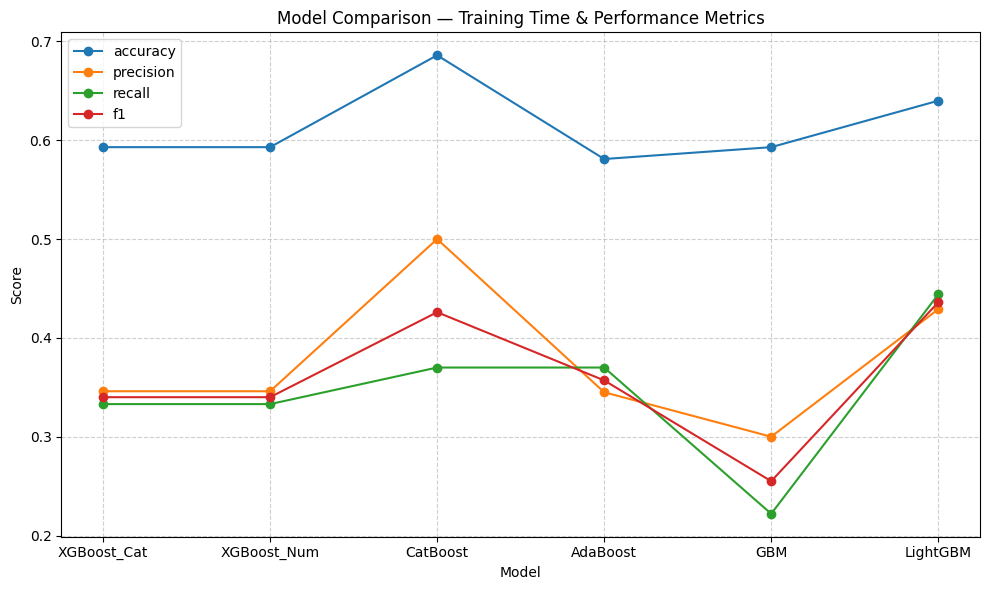

In [148]:
import matplotlib.pyplot as plt

results_df = pd.DataFrame([
    {"model": model, **metrics}
    for model, metrics in results.items()
])

metrics = ["accuracy", "precision", "recall", "f1"]

plt.figure(figsize=(10, 6))
for metric in metrics:
    plt.plot(results_df["model"], results_df[metric], marker='o', label=metric)

plt.title("Model Comparison — Training Time & Performance Metrics")
plt.xlabel("Model")
plt.ylabel("Score")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

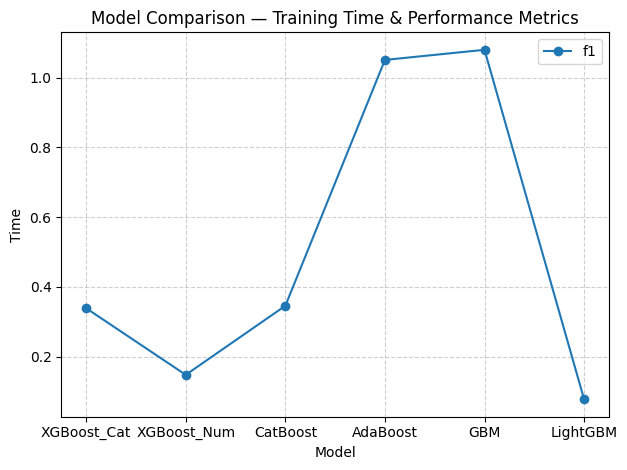

In [149]:
plt.plot(results_df["model"], results_df["training_time"], marker='o', label=metric)

plt.title("Model Comparison — Training Time & Performance Metrics")
plt.xlabel("Model")
plt.ylabel("Time")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()